## Exercice 1
Dans cet exercice en s'interesse à la classification automatique d’un ensemble de fromages (29 observations) décrits par leurs propriétés nutritives (ex. protéines, lipides, etc. ; 9 variables) (Fichier Fromage.txt). 

L’objectif est d’identifier des groupes de fromages homogènes, partageant des caractéristiques similaires.

Nous utiliserons essentiellement deux approches en nous appuyant sur deux procédures des packages spécialisés pour Python : la classification ascendante hiérarchique (CAH – Package SciPy) ; la méthode des centres mobiles (k-Means – Package Scikit-Learn).

Travail demandé:

• Chargement et description des données
• Classification automatique
• Pistes pour la détection du nombre adéquat de classes
• Description – interprétation des groupes

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import plotly as py
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('fromage.csv', delimiter='\t')
df.head()

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [22]:
df.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


Nous avons 9 propriétés influant sur notre fromage, reste à voir si les 9 ont de réelles différences afin de les considérer comme utile afin d'effectuer les clusters.

1 - Calories

<AxesSubplot:xlabel='calories', ylabel='Count'>

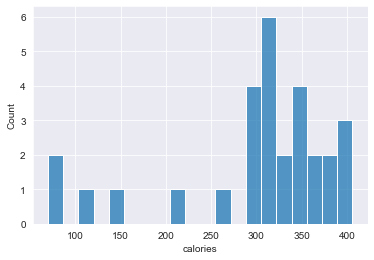

In [6]:
sns.histplot(df['calories'], bins=20)

On voit déjà bien des semblants de cluster, on peut garder les calories.

2 - Sodium

<AxesSubplot:xlabel='sodium', ylabel='Count'>

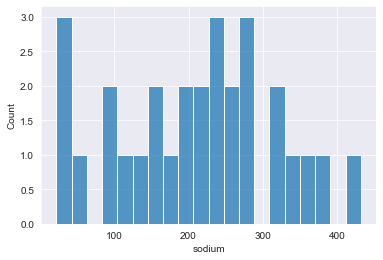

In [7]:
sns.histplot(df['sodium'], bins=20)

De même, les données sont bien réparties.

<AxesSubplot:xlabel='calcium', ylabel='Count'>

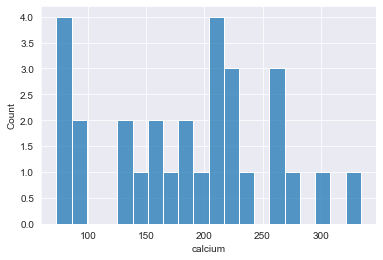

In [8]:
sns.histplot(df['calcium'], bins=20)

<AxesSubplot:xlabel='lipides', ylabel='Count'>

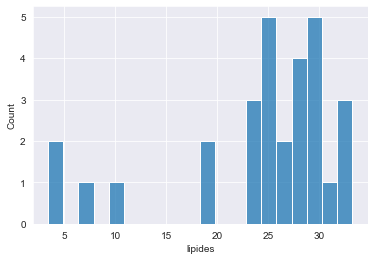

In [9]:
sns.histplot(df['lipides'], bins=20)

<AxesSubplot:xlabel='retinol', ylabel='Count'>

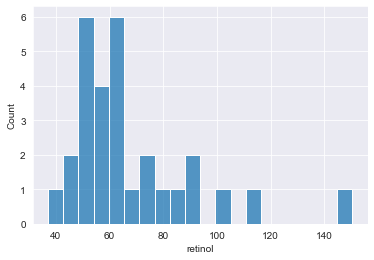

In [12]:
sns.histplot(df['retinol'], bins=20)

<AxesSubplot:xlabel='folates', ylabel='Count'>

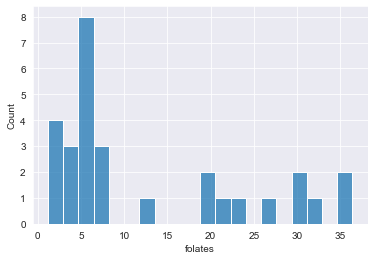

In [13]:
sns.histplot(df['folates'], bins=20)

<AxesSubplot:xlabel='proteines', ylabel='Count'>

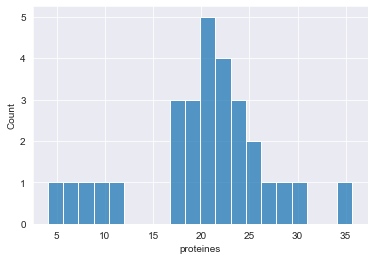

In [10]:
sns.histplot(df['proteines'], bins=20)

<AxesSubplot:xlabel='cholesterol', ylabel='Count'>

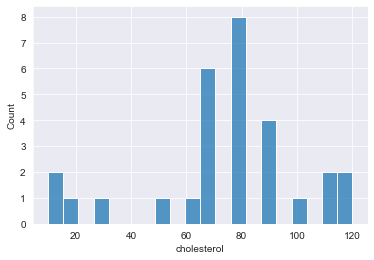

In [11]:
sns.histplot(df['cholesterol'], bins=20)

<AxesSubplot:>

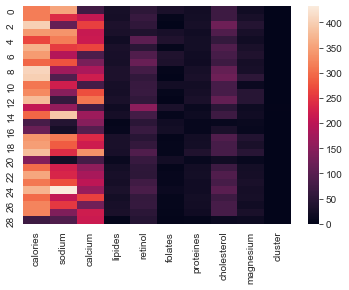

In [43]:
sns.heatmap(df.drop(["Fromages"], axis = 1))

Calories, sodium et calcium semblent être les plus intéressants

Toutes les données semblent bien avoir un interet, on peut visuellement déjà voir des sortes de cluster apparaître.

    2) Classification automatique

In [37]:
X = df.drop(["Fromages"], axis = 1)
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
y = cluster.fit_predict(X)

In [38]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1]


In [39]:
df['cluster'] = pd.DataFrame(y)

In [40]:
df.head()

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,cluster
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20,0
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27,0
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41,0
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27,0
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20,0


Afin de définir quel graphique pourrait être le plus parlant, essayons avec ce que nous avions vu dans la heatmap.

In [48]:
trace1 = go.Scatter3d(
    x= df['calories'],
    y= df['sodium'],
    z= df['calcium'],
    mode='markers',
    marker=dict(
        color = df['cluster'],
        size= 8,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    title= 'Cheese with Agglomerative hierarchical Clustering',
    scene = dict(
        xaxis = dict(title  = 'Calories'),
        yaxis = dict(title  = 'Sodium'),
        zaxis = dict(title  = 'Calcium')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

2 - détection du nombre adéquat de classe

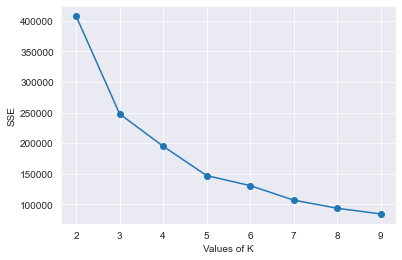

In [46]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    model = KMeans(n_clusters = K)
    model.fit(X)
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

On peut considérer 5 comme étant le plus optimal

In [63]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.63875000e+02  1.46125000e+02  2.57025000e+02  2.90500000e+01
   6.36000000e+01  3.86250000e+00  2.65625000e+01  9.62500000e+01
   3.88750000e+01 -2.77555756e-17]
 [ 3.29800000e+02  3.06600000e+02  2.06820000e+02  2.68700000e+01
   6.42400000e+01  1.19100000e+01  2.10800000e+01  8.20000000e+01
   2.74000000e+01 -2.77555756e-17]
 [ 1.01750000e+02  4.47500000e+01  1.33750000e+02  6.27500000e+00
   5.51500000e+01  1.64750000e+01  7.20000000e+00  1.82500000e+01
   1.12500000e+01  1.00000000e+00]
 [ 2.97857143e+02  2.39785714e+02  1.03842857e+02  2.49142857e+01
   8.39285714e+01  2.30571429e+01  1.89714286e+01  7.14285714e+01
   2.17142857e+01 -2.77555756e-17]]


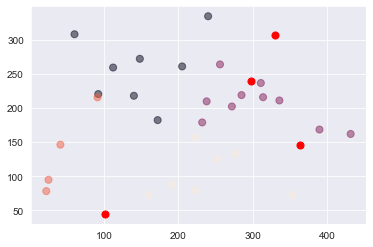

In [64]:
plt.scatter(df['sodium'], df['calcium'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Hormis pour notre couleur rouge, on observe bien les 5 groupes distinctement. Fromages faible en sodium et calcium, fromage faible en calcium moyen en sodium, fromage fort en sodium, et fromage fort en calcium.